In [33]:
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
from time import sleep

## Provide an IMDB series ID

In [34]:
# the series id is found in the url of an IMDB link: https://www.imdb.com/title/tt0141842/
# in this case it is tt0141842 for the Sopranos
series_id = input('Please Provide an IMDB Series ID:  ')

## Get the amount of seasons for a certain series ID

In [35]:
imbd_link = f'https://www.imdb.com/title/{series_id}/episodes'
response = get(imbd_link)
soup = BeautifulSoup(response.content)

try:
    amount_of_seasons = int(soup.findAll('select',{'id':'bySeason'})[0].findAll('option')[-1].string.split()[0])
except:
    amount_of_seasons = int(soup.findAll('select',{'id':'bySeason'})[0].findAll('option')[-2].string.split()[0])

In [36]:
print(f'Estimated run time: {10*amount_of_seasons}')

colors = ['black','salmon','lightgreen',
         'cyan','crimson','rebeccapurple',
         'orange','forestgreen','red']

df = pd.DataFrame(columns=['Title','Rating','Color','Season'])

color_count = 0
for season in range(1,amount_of_seasons+1):
    
    color = colors[color_count]

    color_count += 1
    
    imbd_link = f'https://www.imdb.com/title/{series_id}/episodes?season={season}'
    response = get(imbd_link)
    soup = BeautifulSoup(response.content)
    
    def scrape_data(class_name):
        for episode in soup.findAll('div',{'class':class_name}):    
            try:
                episode_rating = float(episode.find('span',{'class':'ipl-rating-star__rating'}).text)
                episode_airdate = pd.to_datetime(episode.find('div',{'class':'airdate'}).string)
                episode_title = episode.find('a',{'itemprop':'name'}).text

                df.loc[episode_airdate] = episode_title, episode_rating,color,f'Season {season}'

            except:
                pass

    scrape_data('list_item even')
    scrape_data('list_item odd')
    
    sleep(10)

print('Total scraped episodes:')
print(f'    {len(df)}')

Estimated run time: 60
Total scraped episodes:
    85


## Top ten highest rated episodes

In [37]:
df.sort_values('Rating',ascending=False)[['Title','Rating','Season']][:10]

,Title,Rating,Season
2001-05-06,Pine Barrens,9.7,Season 3
2004-05-23,Long Term Parking,9.6,Season 5
2007-06-03,The Blue Comet,9.6,Season 6
2000-04-09,Funhouse,9.4,Season 2
2007-06-10,Made in America,9.3,Season 6
2002-11-10,Whoever Did This,9.3,Season 4
2000-04-02,The Knight in White Satin Armor,9.3,Season 2
2004-06-06,All Due Respect,9.3,Season 5
2001-05-13,Amour Fou,9.2,Season 3
2002-12-08,Whitecaps,9.2,Season 4


## Top ten lowest rated episodes

In [38]:
df.sort_values('Rating',ascending=True)[['Title','Rating','Season']][:10]

,Title,Rating,Season
2002-09-29,Christopher,7.8,Season 4
1999-03-14,A Hit Is a Hit,7.9,Season 1
2004-04-18,In Camelot,7.9,Season 5
2007-04-29,Chasing It,7.9,Season 6
2002-11-24,Calling All Cars,8.0,Season 4
2000-01-23,Do Not Resuscitate,8.0,Season 2
2002-10-13,Pie-o-My,8.1,Season 4
2002-10-27,Watching Too Much Television,8.1,Season 4
2006-05-14,Moe n' Joe,8.1,Season 6
2001-04-22,The Telltale Moozadell,8.1,Season 3


## Plotting episode ratings vs time

<Axes: title={'center': 'Episode Ratings vs Time'}, xlabel='Year', ylabel='Rating'>

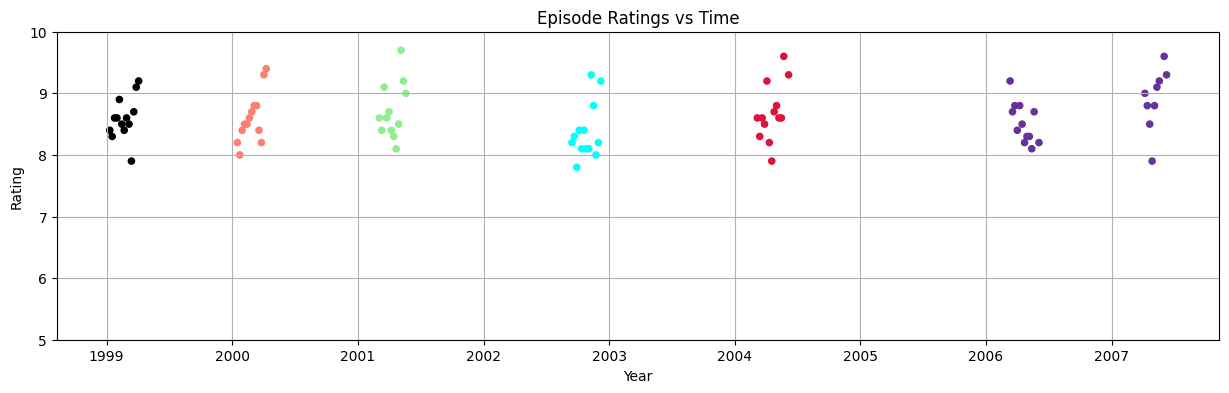

In [39]:
df.reset_index().plot.scatter(x = 'index', y = 'Rating',c='Color',grid=True,ylim=[round(df['Rating'].min()-3),10],figsize=[15,4],title='Episode Ratings vs Time',xlabel='Year')

## Highest rated seasons

In [40]:
df.groupby('Season')['Rating'].mean().sort_values(ascending=False)[:5]

Season
Season 3    8.716667
Season 6    8.685714
Season 5    8.684615
Season 2    8.600000
Season 1    8.592308
Name: Rating, dtype: float64